In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import special

### Berechnung von zu erwartenden Kantenanzahlen

In [2]:
def calc_expected_edges_p(n, p):
    if n < 2:
        raise ValueError("n muss größer als 1 sein!")
    if p < 0 or p > 1:
        raise ValueError("p muss Wahrscheinlichkeit sein!")
    
    return n-1 + p * ((n**2-3*n+2)/2)

In [3]:
calc_expected_edges_p(10, 0.5)

27.0

In [4]:
calc_expected_edges_p(20,0.15205)

45.00055

Es sieht gut aus, es werden ungefaehr die erwarteten Kantenzahlen im Durchschnitt erreicht

In [4]:
p_005 = r"D:/Uni/Masterarbeit/Code/output/500_runs_TreePlusP_0.050000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000/simulation_1/edges_count.txt"
p_01 = r"D:\Uni\Masterarbeit\Code\output\500_runs_TreePlusP_0.100000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000\simulation_1/edges_count.txt"
p_015 = r"D:/Uni/Masterarbeit/Code/output/500_runs_TreePlusP_0.150000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000/simulation_1/edges_count.txt"
p_02 = r"D:/Uni/Masterarbeit/Code/output/500_runs_TreePlusP_0.200000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000/simulation_1/edges_count.txt"
arr005 = np.loadtxt(p_005)
arr_01 = np.loadtxt(p_01)
arr_015 = np.loadtxt(p_015)
arr_02 = np.loadtxt(p_02)
print(arr005.mean())
print(arr_01.mean())
print(arr_015.mean())
print(arr_02.mean())

10.848
12.69
14.198
16.222


### erste Auswertung

In [5]:
output_path = r"D:\Uni\Masterarbeit\Code\output"

In [19]:
df = pd.read_csv(os.path.join(output_path, "500_runs_TreePlusP_0.050000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000", "simulation_0", "results.txt")).iloc[:, :-1]

In [20]:
df

,Schranke4b,Greedy,Optimum
0,28.989672,32.884563,30.896786
1,27.857117,29.735813,29.355550
2,26.951516,29.664058,28.382865
3,31.660581,36.626334,32.546514
4,40.830069,43.162540,43.162540
...,...,...,...
495,27.061499,30.413896,30.413896
496,29.887841,32.458212,30.346837
497,30.028594,30.278296,30.278296
498,14.730656,15.505075,15.505075


In [23]:
df = pd.DataFrame(columns=["Schranke4b", "Greedy", "Optimum"])

In [28]:
l = os.listdir(os.path.join(output_path, "500_runs_TreePlusP_0.050000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000", "simulation_0"))
l

['Greedy', 'Optimum', 'results.txt', 'Schranke4b']

In [32]:
[i for i in l if not "." in i]

['Greedy', 'Optimum', 'Schranke4b']

In [8]:
def read_files(dir_path):
    """
    Ist dafuer da, fuer eine Konfiguration alle Simulationen einzulesen und in ein Dataframe zu packen
    """
    
    # muss erstmal rausfinden, welche Simulationen alle gemacht wurden
    sims = os.listdir(dir_path)
#     print(sims)

    # erstes Dataframe, an das dann angebaut wird
    df = pd.read_csv(os.path.join(dir_path, sims[0], "results.txt")).iloc[:,:-1]
    
    for sim in sims[1:]:
#         print(sim)
#         # nehme nur alle Ordner und keine Datein
#         for alg in [a for a in os.listdir(os.path.join(dir_path, sim)) if not "." in a]:
#             print(alg)

        # nehme die results und packe sie an df dran
        df_sim = pd.read_csv(os.path.join(dir_path, sim, "results.txt")).iloc[:,:-1]
        # dabei gehe ich aus, dass selbst, wenn die results in unterschiedlichen Spalten gespeichert werden, dass
        # die an die dazugehoerige, bereits vorhandene Spalte angegliedert werden
        df = pd.concat([df, df_sim], ignore_index=True)
    
    return df

In [8]:
# lese jetzt fuer alle zusammen gehoerenden Simulationen ein
sims = ["500_runs_TreePlusP_0.500000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000",
        "500_runs_TreePlusP_0.450000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000",
       "500_runs_TreePlusP_0.400000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000",
       "500_runs_TreePlusP_0.350000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000",
       "500_runs_TreePlusP_0.300000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000",
       "500_runs_TreePlusP_0.250000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000",
       "500_runs_TreePlusP_0.200000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000",
       "500_runs_TreePlusP_0.150000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000",
       "500_runs_TreePlusP_0.100000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000",
       "500_runs_TreePlusP_0.050000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000",
       "500_runs_Tree_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000"]
ps0 = [float(sim.split("_")[3]) for sim in sims if sim.split("_")[2] == "TreePlusP"]
ps0.append(0.)
dfs = [read_files(os.path.join(output_path, p)) for p in sims]
# df_dict = {ps[i]: dfs[i] for i in range(len(sims))}

In [10]:
ps0

[0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0]

In [11]:
means = [df.mean() for df in dfs]

In [12]:
m_dic = {alg: [m[alg] for m in means] for alg in means[0].index}

Text(0, 0.5, 'im Mittel erzielter Erwartungswert')

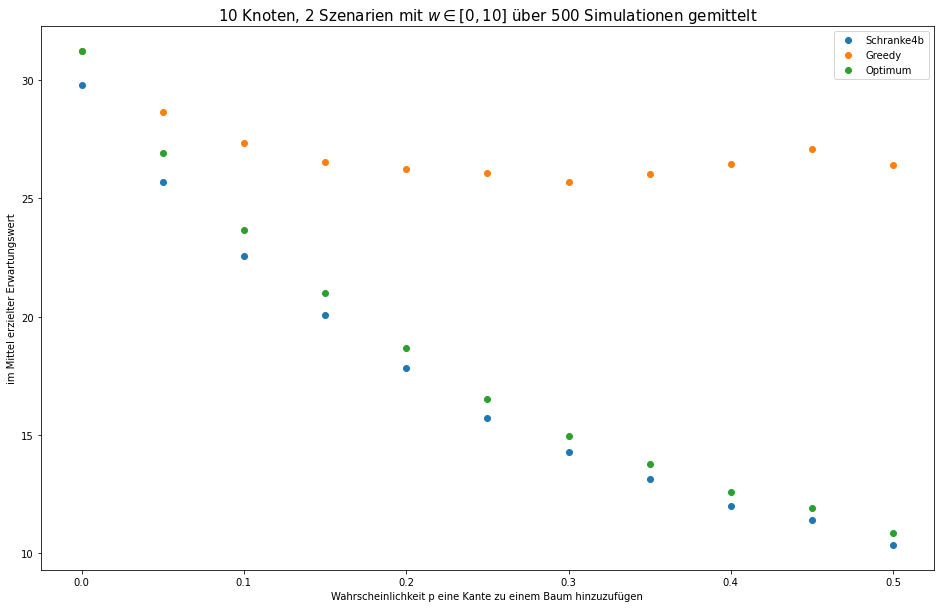

In [13]:
fig, ax = plt.subplots(figsize=(16,10))

for alg in m_dic:
    ax.plot(ps0, m_dic[alg], "o", label=alg)
ax.legend()
ax.set_title("10 Knoten, 2 Szenarien mit $w \in [0,10]$ über 500 Simulationen gemittelt", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")

### Interpretation
Man erkennt deutlich, dass der Greedy-Alg. für einen Baum das optimale Ergebnis findet. 

Auch für ein p von 0.05, also eine Kante wird nur zu 5% in den Graphen eingebaut, fällt der Greedy-Alg. schon ordentlich ab

Außerdem wird die optimale Lösung immer kleiner, je mehr Kanten dazukommen. Das erkläre ich mir damit, dass es dadurch dass es mehr Kanten gibt auch mehr mit einem geringen Gewicht gibt, die dann ausgewählt werden können, um einen Spannbaum zu konstruieren.

Was ich auch spannend finde ist, dass die optimale Lösung gefühlt nicht weit weg von der 4b-Schranke liegt. 

Will noch greedy und schranke fuer groessere p durchrechnen und dazu plotten

will noch schauen, ob es vorkommt, dass bruteforce die Schranke erreicht

### will noch schauen, wie oft greedy das Optimum erreicht

In [535]:
runs = [df.shape[0] for df in dfs]
runs

[500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 500]

In [536]:
counts = [df[df["Greedy"] == df["Optimum"]].shape[0] for df in dfs]
counts

[0, 0, 0, 0, 3, 10, 28, 85, 214, 471, 500]

In [542]:
anteile = [counts[i]/runs[i] for i in range(len(runs))]
anteile

[0.0, 0.0, 0.0, 0.0, 0.006, 0.02, 0.028, 0.085, 0.214, 0.471, 1.0]

In [538]:
# berechnet, wie wahrscheinlich es ist, dass genau k Kanten bei geg. p zum Tree noch hinzugefuegt werden
def f(p, n, k):
    return special.comb((n**2-3*n+2)/2, k) * (1-p) ** (((n**2-3*n+2)/2) - k) * p ** k

In [541]:
p_linspace = np.linspace(0,0.5,300)
p_anteile_tree = f(p_linspace, 10, 0)
p_anteile1 = sum([f(p_linspace, 10, k) for k in range(2)])
p_anteile2 = sum([f(p_linspace, 10, k) for k in range(3)])
p_anteile3 = sum([f(p_linspace, 10, k) for k in range(4)])

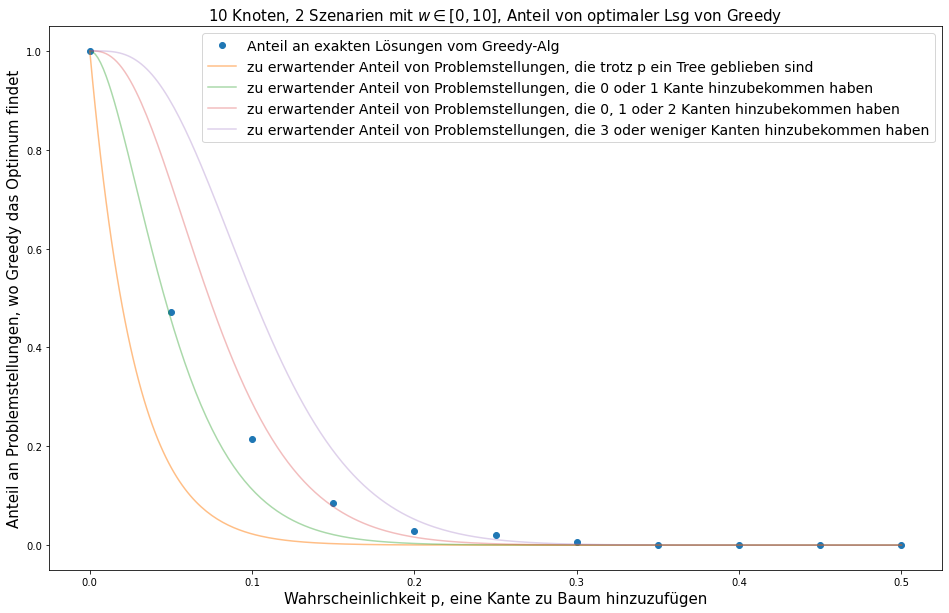

In [547]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(ps0, anteile, "o", label="Anteil an exakten Lösungen vom Greedy-Alg")
ax.plot(p_linspace, p_anteile_tree, alpha=0.5, label="zu erwartender Anteil von Problemstellungen, die trotz p ein Tree geblieben sind")
ax.plot(p_linspace, p_anteile1, alpha=0.4, label="zu erwartender Anteil von Problemstellungen, die 0 oder 1 Kante hinzubekommen haben")
ax.plot(p_linspace, p_anteile2, alpha=0.3, label="zu erwartender Anteil von Problemstellungen, die 0, 1 oder 2 Kanten hinzubekommen haben")
ax.plot(p_linspace, p_anteile3, alpha=0.3, label="zu erwartender Anteil von Problemstellungen, die 3 oder weniger Kanten hinzubekommen haben")

ax.legend(fontsize=14)
ax.set_title("10 Knoten, 2 Szenarien mit $w \in [0,10]$, Anteil von optimaler Lsg von Greedy", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p, eine Kante zu Baum hinzuzufügen", fontsize=15)
ax.set_ylabel("Anteil an Problemstellungen, wo Greedy das Optimum findet", fontsize=15)
plt.savefig("Bilder/greedy_opt.png")

### Interpretation
Der Greedy-Alg. schafft teilweise auch noch dann, die optimale Lösung zu finden, wenn bereits ein paar Kanten hinzugefuegt wurden. 
Er schafft es häufiger die optimale Lösung zu finden, als es Tree-Aufgaben gibt.
Er schafft es auch häufiger die optimale Lösung zu finden, als es Aufgaben gibt wo höchstens 1 Extrakante da ist.

Sobald es aber mehr als 2 bis 3 Extrakanten gibt, schafft es der Greedy-Alg nicht mehr alle davon perfekt zu lösen.

So verstehe ich das bisher

und so wie ich das sehe, ist es keine gute Idee zu sagen, man nimmt den Anteil an optimal gelösten Problemen als Ordnungsparameter, weil der einfach nur mit der Wahrscheinlichkeit, ein leichtes Problem zu erzeugen korrelliert

Vielleicht muss ich auch am Anfang viel mit sehr kleinen p simulieren? und mit mehr szenarien

# Jetzt das ganze für mehrere Systemgrößen machen und plotten

In [14]:
def greedy_vs_opt(ueber_path):
    
    output_path = r"D:\Uni\Masterarbeit\Code\output"
    
    # brauche die ps
    konfigs = os.listdir(os.path.join(output_path, ueber_path))
    ps = [float(k.split("_")[1]) for k in konfigs]
    
    # gehe ueber alle Simulationen zugegebener Konfiguration 
    dfs = [read_files(os.path.join(output_path, ueber_path, p)) for p in konfigs]
    
    # anzahl an Simulationen
    runs = [df.shape[0] for df in dfs]
    
    # anzahl an Uebereinstimmungen
    counts = [df[df["Greedy"] == df["Optimum"]].shape[0] for df in dfs]

    # das zusammen in anteile
    anteile = [counts[i]/runs[i] for i in range(len(runs))]
    
    return ps, anteile

In [566]:
p, a = greedy_vs_opt(r"Greedy_Optimum\\10Knoten_5Szenarien")
p10, a10 = greedy_vs_opt(r"Greedy_Optimum\\10Knoten_10Szenarien")
p50, a50 = greedy_vs_opt(r"Greedy_Optimum\\10Knoten_50Szenarien")
p100, a100 = greedy_vs_opt(r"Greedy_Optimum\\10Knoten_100Szenarien")

Text(0, 0.5, 'Anteil an Problemstellungen, wo Greedy das Optimum findet')

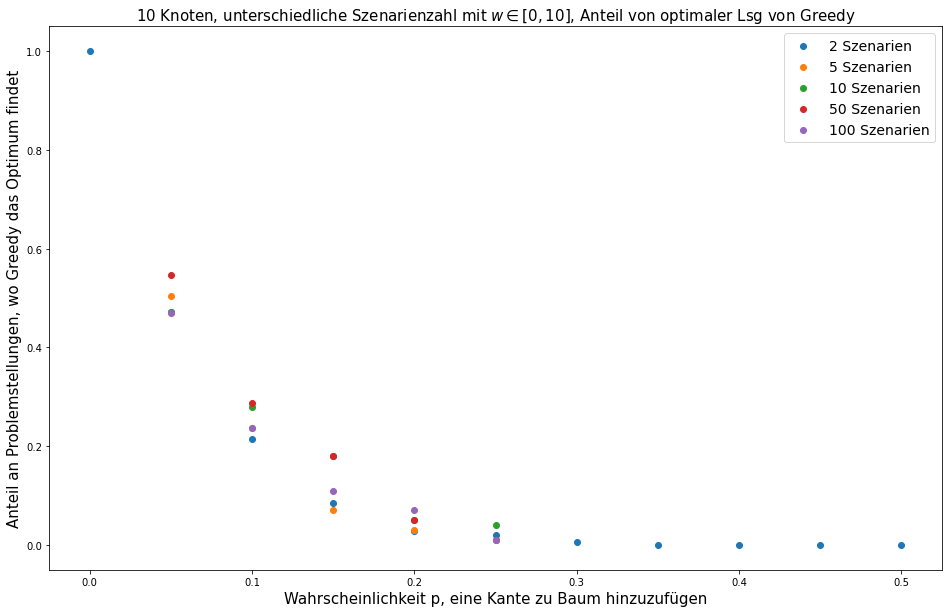

In [567]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ps0, anteile, label="2 Szenarien")
ax.scatter(p, a, label="5 Szenarien")
ax.scatter(p10, a10, label="10 Szenarien")
ax.scatter(p50, a50, label="50 Szenarien")
ax.scatter(p100, a100, label="100 Szenarien")


# ax.plot(p_linspace, p_anteile_tree, alpha=0.5, label="zu erwartender Anteil von Problemstellungen, die trotz p ein Tree geblieben sind")
# ax.plot(p_linspace, p_anteile1, alpha=0.4, label="zu erwartender Anteil von Problemstellungen, die 0 oder 1 Kante hinzubekommen haben")
# ax.plot(p_linspace, p_anteile2, alpha=0.3, label="zu erwartender Anteil von Problemstellungen, die 0, 1 oder 2 Kanten hinzubekommen haben")
# ax.plot(p_linspace, p_anteile3, alpha=0.3, label="zu erwartender Anteil von Problemstellungen, die 3 oder weniger Kanten hinzubekommen haben")

ax.legend(fontsize=14)
ax.set_title("10 Knoten, unterschiedliche Szenarienzahl mit $w \in [0,10]$, Anteil von optimaler Lsg von Greedy", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p, eine Kante zu Baum hinzuzufügen", fontsize=15)
ax.set_ylabel("Anteil an Problemstellungen, wo Greedy das Optimum findet", fontsize=15)
# plt.savefig("Bilder/greedy_opt.png")

### mache jetzt mal nur 10 Szenarien, aber fuer unterschiedliche Graphengrößen

## Hier muss das selbe rauskommen:

In [129]:
p1 = "250_runs_TreePlusP_0.000000_p_13_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000"
p2 = "250_runs_Tree_13_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000"
print(read_files(os.path.join(output_path, p1)).mean())
print(read_files(os.path.join(output_path, p2)).mean())

Schranke4b    40.364488
Greedy        42.164875
Optimum       42.164875
dtype: float64
Schranke4b    40.226657
Greedy        41.954320
Optimum       41.954320
dtype: float64


Sieht ganz gut ähnlich aus

In [7]:
def fu(ordner):
    
    # Überordner
    ordner_path = os.path.join(r"D:\Uni\Masterarbeit\Code\output", ordner)
    
    # jetzt alle Ergebnisse einlesen
    simulations = os.listdir(ordner_path)
    
    # dictionary, was mir fuer die verschiedenen Simulationen den Index zum relevanten Parameter gibt
    # Fuer TreePlusP, ist hier die Wahrscheinlichkeit p relevant
    d = {"TreePlusP": 1}
    ps = [float(sim.split("_")[d[sim.split("_")[0]]]) for sim in simulations]
    dfs = [read_files(os.path.join(ordner_path, s)) for s in simulations]
    
    # jetzt Daten verarbeiten
    
    # zeigt, wie oft jedes Parametersetting simuliert wurde
    runs = [df.shape[0] for df in dfs]
    
    # berechnet fuer die angegebenen Algorithmen die mean performance
    means = [df.mean() for df in dfs]
    
    # standardabweichungen
    stds = [df.std() for df in dfs]
#     return means
    # baut mir alle Mittelwerte pro Algorithmus zusammen
#     m_dic = {alg: [m[alg] for m in means] for alg in means[0].index}
    
    m_dic = {}
    for i, m in enumerate(means):
        for alg in m.index:
            if alg in m_dic:
                m_dic[alg]['ps'].append(ps[i])
                m_dic[alg]['ms'].append(m[alg])
                m_dic[alg]['stds'].append(stds[i][alg])
            else:
                m_dic.update({alg: {'ps':[ps[i]], 'ms':[m[alg]], 'stds': [stds[i][alg]]}})
    
    return m_dic

Text(0, 0.5, 'im Mittel erzielter Erwartungswert')

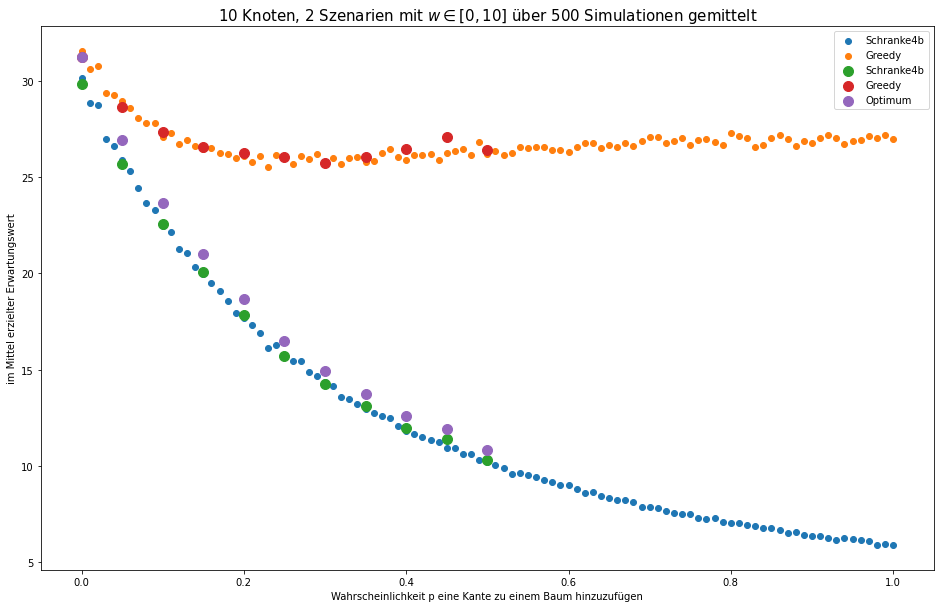

In [16]:
m = fu("TreePlusP_10_genauer")
fig, ax = plt.subplots(figsize=(16,10))
for alg in m:
    ax.scatter(m[alg]['ps'], m[alg]['ms'], label=alg)

for alg in m_dic:
    ax.scatter(ps0, m_dic[alg], s=100,label=alg)
ax.legend()
ax.set_title("10 Knoten, 2 Szenarien mit $w \in [0,10]$ über 500 Simulationen gemittelt", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")

## oberer Plot:
habe nochmal für 10 Knoten die Schranke und den Greedy-Alg über das ganze Intervall von p laufen lassen und damit den ersten Plot verfollständigt. 
die Problemstellungen für p=0 waren wohl etwas lecihter, als im ersten Durchlauf, denn da sind jetzt im zweiten Lauf die Ergebnisse ein bisschen schlechter, aber alles in allem passt das alles sehr gut zusammen

# Jetzt 13 Knoten

Text(0, 0.5, 'im Mittel erzielter Erwartungswert')

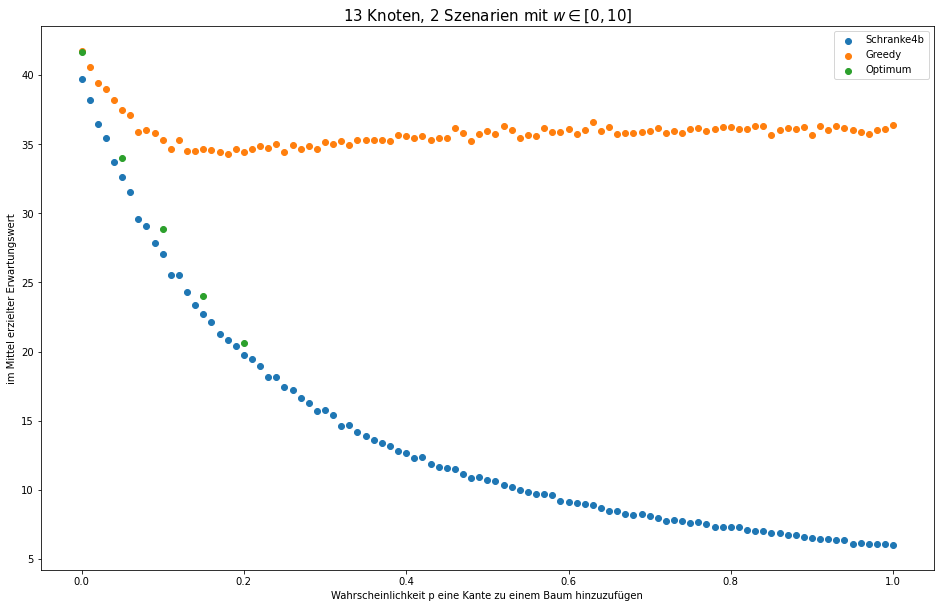

In [155]:
m = fu("TreePlusP_13_2scenarios")
fig, ax = plt.subplots(figsize=(16,10))
for alg in m:
    ax.scatter(m[alg]['ps'], m[alg]['ms'], label=alg)
ax.legend()
ax.set_title("13 Knoten, 2 Szenarien mit $w \in [0,10]$", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")

### Jetzt 13 Knoten mit 10 Szenarien, zusammen mit dem selben Setting fuer 2 Szenarien

Text(0, 0.5, 'im Mittel erzielter Erwartungswert')

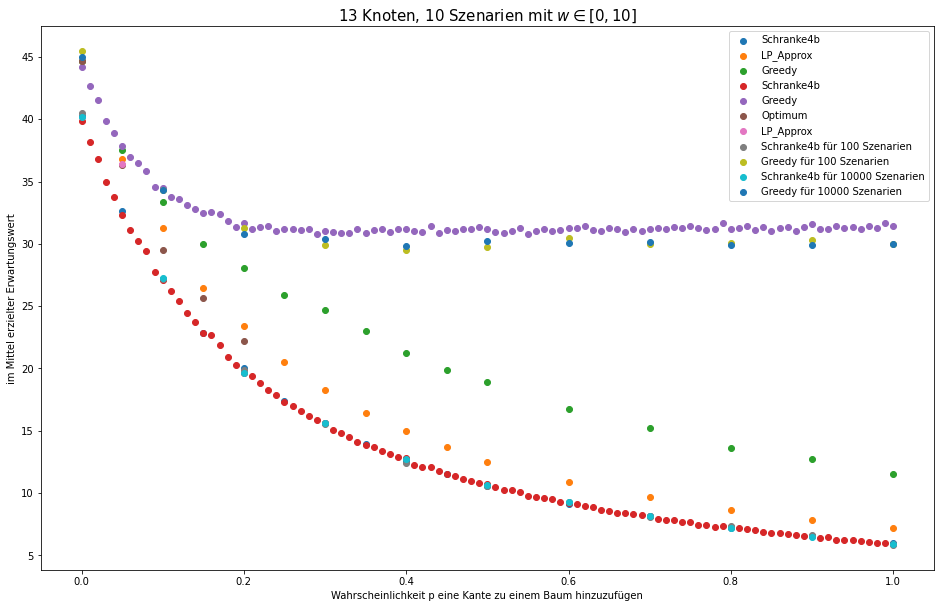

In [27]:
# mapp = fu("TreePlusP_13_10_HPC")

m2 = fu("TreePlusP_13_10_scen")
fig, ax = plt.subplots(figsize=(16,10))

# for alg in mapp:
#     ax.scatter(mapp[alg]['ps'], mapp[alg]['ms'], label=alg)
for alg in m2:
    ax.scatter(m2[alg]['ps'], m2[alg]['ms'], label=alg)
#     ax.errorbar(m2[alg]['ps'], m2[alg]['ms'], m2[alg]['stds'], alpha=0.1,fmt='o', label=f"{alg} für 10 Szenarien", capsize=5)
# ax.scatter(m['Schranke4b']['ps'], m['Schranke4b']['ms'], label='Schranke für 2 Szenarien')
# for i, alg in enumerate(m):
#     ax.scatter(m[alg]['ps'], m[alg]['ms'], label=f"{alg} für 2 Szenarien")
#     if (i % 10) == 0:
#     ax.errorbar(m[alg]['ps'], m[alg]['ms'], m[alg]['stds'], alpha=0.1, fmt='o', label=f"{alg} für 2 Szenarien", capsize=5)


# ax.plot(m['Optimum']['ps'], m['Optimum']['ms'], alpha=0.5, c='brown')
# ax.plot(m2['Optimum']['ps'], m2['Optimum']['ms'], alpha=0.5, c='green')

# lade nochmal greedy und Schranke fuer 100 szenarien rein
m3 = fu("TreePlusP_13_100_scen")

for alg in m3:
    ax.scatter(m3[alg]['ps'], m3[alg]['ms'], label=f"{alg} für 100 Szenarien")
#     ax.errorbar(m3[alg]['ps'], m3[alg]['ms'], m3[alg]['stds'], fmt='o', label=f"{alg} für 100 Szenarien", capsize=5)

m4 = fu("TreePlusP_13_10000_scen")

for alg in m4:
    ax.scatter(m4[alg]['ps'], m4[alg]['ms'], label=f"{alg} für 10000 Szenarien")
#     ax.errorbar(m3[alg]['ps'], m3[alg]['ms'], m3[alg]['stds'], fmt='o', label=f"{alg} für 100 Szenarien", capsize=5)

    
ax.legend()
ax.set_title("13 Knoten, 10 Szenarien mit $w \in [0,10]$", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")

### Interpretation
Die optimalen Ergebnisse liegen jetzt weiter weg von der Schranke. Und man erkennt, dass die Schranke hier unabhängig von der Anzahl an Szenarien ist. Das ergibt auch Sinn, weil es wird für jedes Szenarie der MST ausgerechnet und dann mit der Szenariowahrscheinlichkeit gewichtet. Da die Szenarien aber nach dem selben Schema erzeugt werden, kommt da im mittel wenn man die wieder mit ihren Wahrscheinlichkeiten gewichtet das selbe raus.

### Warum liegt das optimale Ergebnis weiter weg von der Schranke?
Wenn ich nur 1 Szenario hätte, dann würde die Schranke nur einen MST berechnen. Würde die optimale Lösung, dann dieser Lösung entsprechen? Ich nehme mir bei der Schranke dann jeweils die billigere Kante aus beiden Szenarien und baue damit MST, bei der optimalen Lösung brauche ich auch einen MST. Ich bin mir recht sicher, dass das Ergebnis hier gleich ist, da ich auch nur ein Szenario habe und nicht über mehrere Szenarien mitteln muss.

Wenn jetzt ein weiteres Szenario dazukommt ist dann klar, dass das Ergebnis nicht mehr gleich der Schranke sein kann, weil ich jetzt bei der optimalen Lösung Rücksicht auf mehrere Szenarien nehmen muss, während die Schranke immer noch jedes einzeln optimiert. 

**Die Frage ist jetzt nur, wieso wird das mit mehr Szenarien schlechter?**
Ist das ein stochastischer Effekt? Es ist ja auch so, dass der Effekt zu Beginn für den Greedy-Alg auch genauso vorhanden ist (da, wo noch sehr wenige Kanten zusätzlich zum Tree vorhanden sind.) 

Ich schätze, dass das ein stochastischer Effekt ist. Wenn ich nur wenige Szenarien habe, dann ist es wahrscheinlicher, dass die optimale Lösung an die Schrankenlösung ran kommt.




Kann man ausrechnen, wie groß die zu erwartende Differenz ist???



Ich kaufe da auf keinen Fall eine Kante in Phase 1, die in Phase 2 billiger ist, weil dann hätte ich eine bessere Lösung, wenn ich diese Kante in Phase 2 kaufen würde. (Gilt das auch für mehrere Phasen?)

### Warum schafft Greedy-Alg für 10 Szenarien ein besseres Ergebnis als für 2?


Wenn ich wenig Szenarien habe, kann es durch den Zufall sein, dass ich mal zu viele Kanten kaufe, weil die zufälligerweise alle billiger in Phase 1 sind. Genauso kann es auch sein, dass ich kaum Kanten kaufe, weil in den beiden Szenarien in Phase 2 beide teurer sind. Drückt das den mittleren Erwartungswert höher?

Wenn ich dann viele Szenarien habe, ist es unwahrscheinlicher, dass ein großer Anteil der Kanten in den Szenarien extreme Kosten in eine der beiden Richtungen haben oder? Es ist also unwahrscheinlich, dass es für viele Kanten so ist, dass sie in Phase 1 deutlich billiger sind, als in Phase 2.

Kp, ob das als Begründung reicht..

### Standardabweichungen
Die Ergebnisse schwanken für weniger Szenarien stärker

## Punkt, wo sich die Greedy-Kurven schneiden

ab so 100 Szenarien scheint sich hier nicht mehr viel zu ändern. Denke ich, dass das auch für den Abstand der optimalen Lösung von der Schranke gilt?


## noch eingefallen:
Mir ist noch eingefallen, dass wenn ich sehr viele Szenarien habe, dann kann man doch in abhängkeit der Szenariowahrscheinlichkeiten eine Aussage darüber machen, wie wahrscheinlich 1. stage Kosten billiger als erwartete second stage kosten sind. Wenn zB. alle Szenarien gleichwahrscheinlich sind und ich meine Kantengewichte zufällig zwischen 0 und 10 sample, dann ist es doch so, dass der Erwartungswert für viele Szenarien gegen 0.5 geht und das würde bedeuten, dass 50% der Kanten in der ersten Stage billiger sind. 

# hier schaue ich, wie oft das optimale Ergebnis gleich dem der Schranke ist

In [521]:
def check_schranke(ueber_ordner):
    
    konfig_dirs = [p for p in os.listdir(os.path.join(r"D:\Uni\Masterarbeit\Code\output", ueber_ordner))]
    ps = []
    anteile = []
    counts = []
    
    ps_g = []
    anteile_g = []
    counts_g = []
    
    for konfig_dir in konfig_dirs:
        
        p = float(konfig_dir.split("_")[1])
#         for sim in [os.path.join(konfig_dir, s) for s in os.listdir(konfig_dir)]
        
        df = read_files(os.path.join(r"D:\Uni\Masterarbeit\Code\output", ueber_ordner, konfig_dir))
        
        # falls die Spalte "Optimum" existiert
        if "Optimum" in df.columns:
            ps.append(p)
            
            df = df.dropna()
            counts.append(df.shape[0])
            anteile.append((df[df['Greedy'] == df['Schranke4b']]).shape[0]/df.shape[0])
#         else:
#             print("Warnung, hier werden Greedy-Ergebnisse mit der Schranke verglichen!!!")
        ps_g.append(p)
        counts_g.append(df.shape[0])
        anteile_g.append((df[df['Greedy'] == df['Schranke4b']]).shape[0]/df.shape[0])
        
    return ps, anteile, counts, ps_g, anteile_g, counts_g

In [522]:
pps, aas, c, ppg, aag, cg = check_schranke("TreePlusP_13_2scenarios")

In [528]:
print(ppg[:5])
print(aag[:5])
print(c)

[0.0, 0.01, 0.02, 0.03, 0.04]
[0.004, 0.003, 0.006, 0.004, 0.005]
[250, 250, 250, 250, 250]


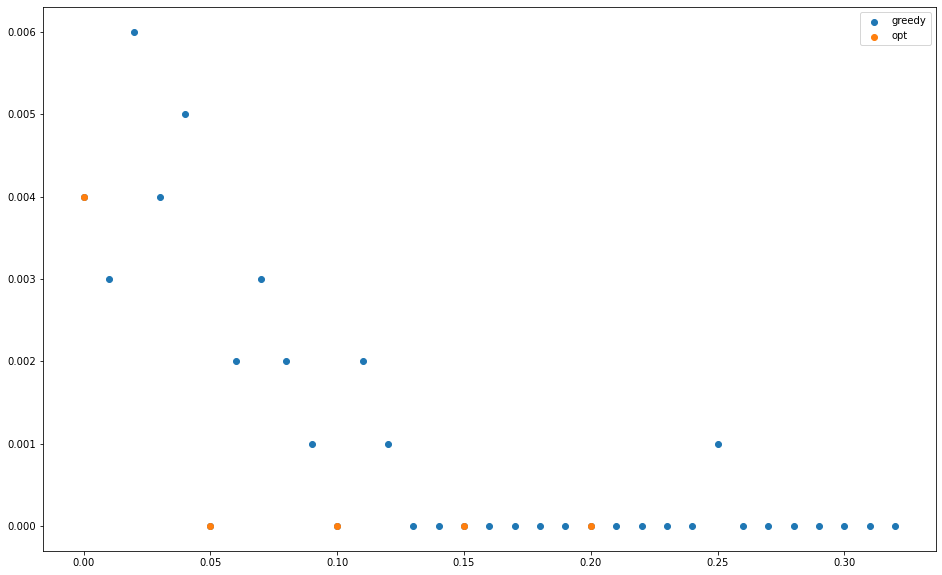

In [526]:
# print(ppg[:25])
# print(aag[:25])
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ppg[:33], aag[:33], label='greedy')
ax.scatter(pps, aas, label='opt')
ax.legend()

In [465]:
xxx = read_files(r"D:\Uni\Masterarbeit\Code\output\TreePlusP_10_genauer\TreePlusP_0.000000_p_10_nodes_2_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000").dropna()
xxx

,Schranke4b,Greedy
0,28.529237,29.283103
1,28.683635,28.683635
2,31.729285,32.216377
3,41.846252,42.182865
4,40.182497,40.182497
...,...,...
995,25.773947,26.329133
996,20.373662,21.755265
997,27.617217,28.744796
998,23.438053,23.438053


In [466]:
(xxx[xxx['Greedy'] == xxx['Schranke4b']]).shape[0]/xxx.shape[0]

0.027

# Hier überprüfe ich, ob eine Kante, die ich nach optimaler Lsg in Phase 1 kaufe in Phase 2 im Mittel teurer ist

In [181]:
def read_scenario_probs(path):
    """ path ist der Pfad zur Datei"""
    return pd.read_csv(path, names=['Wahrscheinlichkeit'])

In [194]:
def read_scenarios_alone(path):
    """ path ist der Pfad zur Datei"""    
    return pd.read_csv(path)

In [358]:
def read_scenarios(path):
    """path ist Pfad zu Problems-Ordner
    
    gibt die Szenarien und die Wahrscheinlichkeiten in Listen aus, die in der numerierten Reihenfolge der Datein im Ordner sind
    """
    
    # lese in der richtigen Reihenfolge ein
    number_sims = int(len(os.listdir(path))/2)
    
    
#     scenarios = [pd.read_csv(os.path.join(path, f,), skipinitialspace=True).iloc[:, :-1] for f in os.listdir(path) if not "probs" in f]
#     probs = [pd.read_csv(os.path.join(path, f), names=['Wahrscheinlichkeit']) for f in os.listdir(path) if "probs" in f]
   
    scenarios = [pd.read_csv(os.path.join(path, f"scenarios{i}.csv"), skipinitialspace=True).iloc[:, :-1].set_index('EdgeID') for i in range(number_sims)]
    probs = [pd.read_csv(os.path.join(path, f"scenario_probs{i}.csv"), names=['Wahrscheinlichkeit']) for i in range(number_sims)]
    return scenarios, probs

In [359]:
pp = r"D:\Uni\Masterarbeit\Code\output\test\Tree_10_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000\simulation_1\Problems"

In [360]:
sc, pr = read_scenarios(pp)

In [361]:
bsp_sc, bsp_pr = sc[0], pr[0]
bsp_sc

,first_stage_costs,scenario0,scenario1,scenario2,scenario3,scenario4
EdgeID,,,,,,
0,0.807789,8.515360,7.13085,6.67122,6.736430,6.41494
7,5.199900,6.309890,4.26208,1.95739,0.328782,6.40281
2,6.978920,1.290280,9.80423,6.34293,6.494740,2.01120
3,8.363240,9.671820,6.62952,3.65764,0.104276,2.27906
5,9.289510,4.385230,1.65039,2.02317,6.270190,8.29539
4,8.782890,1.233430,5.27996,5.63642,2.314520,6.70830
1,7.866150,0.283126,7.39479,3.03442,0.790415,6.21413
8,0.474282,8.025480,9.07934,2.58870,7.426970,1.09802
6,7.557360,9.405460,6.07975,8.70795,9.761170,7.10216


In [267]:
bsp_pr

,Wahrscheinlichkeit
0,0.184368
1,0.094176
2,0.144447
3,0.273865
4,0.303143


In [337]:
bsp_sc['EV'] = (bsp_sc.loc[:, 'scenario0':'scenario4'].values * bsp_pr['Wahrscheinlichkeit'].values).sum(1)

In [338]:
bsp_sc

,EdgeID,first_stage_costs,scenario0,scenario1,scenario2,scenario3,scenario4,EV
0,0,0.807789,8.515360,7.13085,6.67122,6.736430,6.41494,6.994672
1,7,5.199900,6.309890,4.26208,1.95739,0.328782,6.40281,3.878477
2,2,6.978920,1.290280,9.80423,6.34293,6.494740,2.01120,4.465794
3,3,8.363240,9.671820,6.62952,3.65764,0.104276,2.27906,3.655292
4,5,9.289510,4.385230,1.65039,2.02317,6.270190,8.29539,5.488040
5,4,8.782890,1.233430,5.27996,5.63642,2.314520,6.70830,4.206257
6,1,7.866150,0.283126,7.39479,3.03442,0.790415,6.21413,3.287164
7,8,0.474282,8.025480,9.07934,2.58870,7.426970,1.09802,5.075475
8,6,7.557360,9.405460,6.07975,8.70795,9.761170,7.10216,8.390685


In [362]:
# die Optimums maps einlesen
def readLGF_Network(source):
    mInFile = open(source, mode='r')
    fileString = mInFile.read()
    mInFile.close()
    if '@arcs' in fileString:
        initKey = '@arcs'
        initPos = 6
    elif '@edges' in fileString:
        initKey = '@edges'
        initPos = 7
    else:
        print('No keyword \'@arcs\' or \'@edges\' found\n Wrong file format')
        return
    strDat = fileString[fileString.find(initKey)+initPos:].split("\n", 1)[1]
    
    df = pd.DataFrame(columns=['u', 'v', 'id', 'first_stage'])
    
    for row in strDat.split('\n')[:-1]:
        s = row.split("\t")
        df = df.append({'u': int(s[0]), 'v': int(s[1]), 'id': int(s[2]), 'first_stage': int(s[3])}, ignore_index=True)
    return df

In [363]:
ddf = readLGF_Network(expa)
ddf

,u,v,id,first_stage
0,9,7,0,1
1,2,7,1,0
2,6,9,2,0
3,5,9,3,0
4,3,9,4,0
5,4,7,5,0
6,0,4,6,1
7,8,4,7,0
8,1,7,8,1


In [274]:
expa = r"D:\Uni\Masterarbeit\Code\output\test\Tree_10_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000\simulation_1\Optimum\0.txt"
print(readLGF_Network(expa))

9	7	0	1	
2	7	1	0	
6	9	2	0	
5	9	3	0	
3	9	4	0	
4	7	5	0	
0	4	6	1	
8	4	7	0	
1	7	8	1	



In [342]:
bsp_id = bsp_sc.set_index('EdgeID')
bsp_ddf = ddf.set_index('id')
bsp_id

,first_stage_costs,scenario0,scenario1,scenario2,scenario3,scenario4,EV
EdgeID,,,,,,,
0,0.807789,8.515360,7.13085,6.67122,6.736430,6.41494,6.994672
7,5.199900,6.309890,4.26208,1.95739,0.328782,6.40281,3.878477
2,6.978920,1.290280,9.80423,6.34293,6.494740,2.01120,4.465794
3,8.363240,9.671820,6.62952,3.65764,0.104276,2.27906,3.655292
5,9.289510,4.385230,1.65039,2.02317,6.270190,8.29539,5.488040
4,8.782890,1.233430,5.27996,5.63642,2.314520,6.70830,4.206257
1,7.866150,0.283126,7.39479,3.03442,0.790415,6.21413,3.287164
8,0.474282,8.025480,9.07934,2.58870,7.426970,1.09802,5.075475
6,7.557360,9.405460,6.07975,8.70795,9.761170,7.10216,8.390685


In [346]:
bsp_id['first_stage'] = bsp_ddf['first_stage']
bsp_id

,first_stage_costs,scenario0,scenario1,scenario2,scenario3,scenario4,EV,first_stage
EdgeID,,,,,,,,
0,0.807789,8.515360,7.13085,6.67122,6.736430,6.41494,6.994672,1
7,5.199900,6.309890,4.26208,1.95739,0.328782,6.40281,3.878477,0
2,6.978920,1.290280,9.80423,6.34293,6.494740,2.01120,4.465794,0
3,8.363240,9.671820,6.62952,3.65764,0.104276,2.27906,3.655292,0
5,9.289510,4.385230,1.65039,2.02317,6.270190,8.29539,5.488040,0
4,8.782890,1.233430,5.27996,5.63642,2.314520,6.70830,4.206257,0
1,7.866150,0.283126,7.39479,3.03442,0.790415,6.21413,3.287164,0
8,0.474282,8.025480,9.07934,2.58870,7.426970,1.09802,5.075475,1
6,7.557360,9.405460,6.07975,8.70795,9.761170,7.10216,8.390685,1


In [395]:
bsp_id[bsp_id['first_stage'] == 1]

,first_stage_costs,scenario0,scenario1,scenario2,scenario3,scenario4,EV,first_stage
EdgeID,,,,,,,,
0,0.807789,8.51536,7.13085,6.67122,6.73643,6.41494,6.994672,1
8,0.474282,8.02548,9.07934,2.58870,7.42697,1.09802,5.075475,1
6,7.557360,9.40546,6.07975,8.70795,9.76117,7.10216,8.390685,1


In [348]:
bsp_id['first_stage']

EdgeID
0    1
7    0
2    0
3    0
5    0
4    0
1    0
8    1
6    1
Name: first_stage, dtype: object

In [352]:
((bsp_id['first_stage_costs'] < bsp_id['EV']) == bsp_id['first_stage']).all()

True

In [410]:
def compare(setting_path):
    """ gehe in diesem Pfad eines Ordner einer bestimmten Konfiguration alle Simulationsorder durch und schaue, ob 
        fuer alle Kanten, die vom optimalen Alg gekauft wurden gilt, dass sie im Mittel in Phase 2 teurer werden
    """
    
    simulation_paths = [os.path.join(setting_path, p) for p in os.listdir(setting_path)]
    
    not_eq = {}
    
    for sim_p in simulation_paths:
        if not "Optimum" in os.listdir(sim_p):
            print(f"Warnung: Im Ordner '{os.path.split(sim_p)[1]}' existiert kein Optimierungsordner und daher wird er übersprungen!\n")
            continue
        
        sc, sc_probs = read_scenarios(os.path.join(sim_p, 'Problems'))
        
        opt_results = [readLGF_Network(os.path.join(sim_p, 'Optimum', f"{i}.txt")).set_index('id')  for i in range(len(sc))]
            
        for i, df in enumerate(sc):
            df['EV'] = (df.loc[:, 'scenario0':'scenario4'].values * sc_probs[i]['Wahrscheinlichkeit'].values).sum(1)
            df['first_stage'] = opt_results[i]['first_stage']

            # Teilmenge aller Knoten, die von Optimum ausgewählt werden
            sub = df[df['first_stage'] == 1]
            
            # das ist true, falls fuer alle diese Kante gilt, dass sie in der ersten Phase billiger als im Mittel in Phase 2 sind
            all_equal = (sub['first_stage_costs'] < sub['EV']).all()
            
            if not all_equal:
#                 df_with_hint = df.copy()
#                 df_with_hint['not_equal'] = df['first_stage_costs'] >= df['EV']
                not_eq.update({f"{os.path.split(sim_p)[1]}_{i}": df})
#         return joined_dfs
    return not_eq

In [403]:
res = compare(r"D:\Uni\Masterarbeit\Code\output\Test2\TreePlusP_0.100000_p_13_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000")
res

{}

In [446]:
# mache das bisher nur in einem Konfig-Ordner. Wenn p sich aendert oder andere Parameter, dann ich das auch in den anderen Ordnern machen
ueber_path = r"D:\Uni\Masterarbeit\Code\output\Test2"
for konfig_path in os.listdir(ueber_path):
    print(compare(os.path.join(ueber_path, konfig_path)))

{}
{}
{}
{}


# Hier schaue ich mir den LP-Approx-Alg für unterschiedliche Kantenanzahlen an

In [11]:
hpc_ueber_path = os.path.join(output_path, "HPC")
hpc_ueber_path

'D:\\Uni\\Masterarbeit\\Code\\output\\HPC'

In [12]:
os.listdir(hpc_ueber_path)

['TreePlusP_13_10_HPC', 'TreePlusP_30_10_scen_HPC']

### mache je einen Plot pro Knotenanzahl

In [15]:
m13 = fu(os.path.join(hpc_ueber_path, 'TreePlusP_13_10_HPC'))
m30 = fu(os.path.join(hpc_ueber_path, 'TreePlusP_30_10_scen_HPC'))
m50 = fu(os.path.join(hpc_ueber_path, 'TreePlusP_50_10_scen_HPC'))

Text(0, 0.5, 'im Mittel erzielter Erwartungswert')

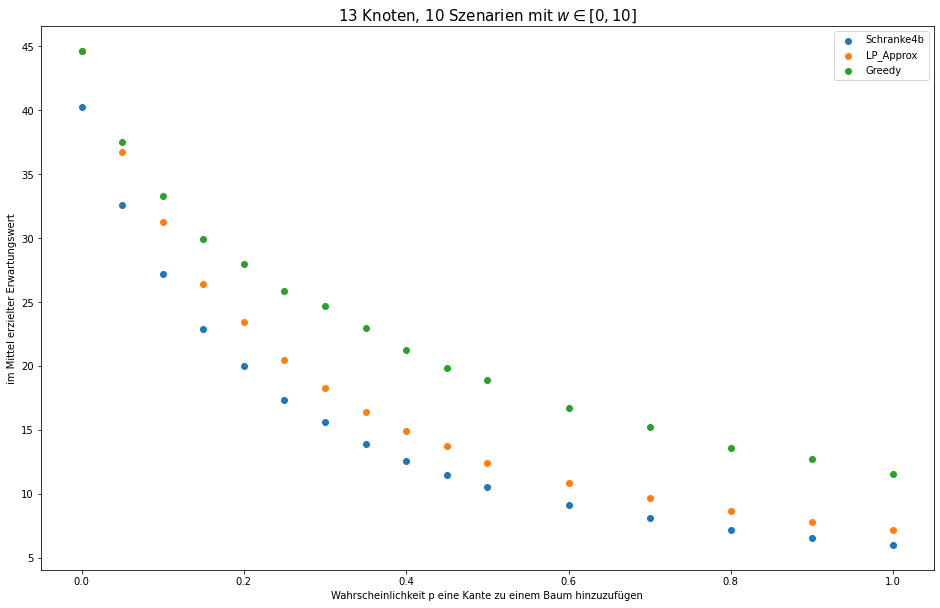

In [17]:
fig, ax = plt.subplots(figsize=(16,10))

for alg in m13:
    ax.scatter(m13[alg]['ps'], m13[alg]['ms'], label=alg)
ax.legend()
ax.set_title("13 Knoten, 10 Szenarien mit $w \in [0,10]$", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")

Text(0, 0.5, 'im Mittel erzielter Erwartungswert')

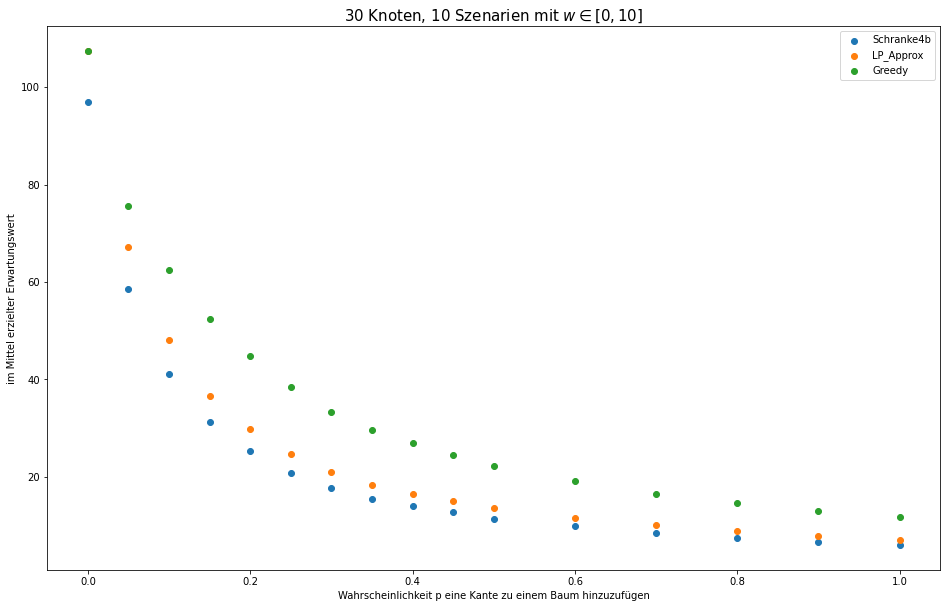

In [19]:
fig, ax = plt.subplots(figsize=(16,10))

for alg in m30:
    ax.scatter(m30[alg]['ps'], m30[alg]['ms'], label=alg)
ax.legend()
ax.set_title("30 Knoten, 10 Szenarien mit $w \in [0,10]$", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")

Text(0, 0.5, 'im Mittel erzielter Erwartungswert')

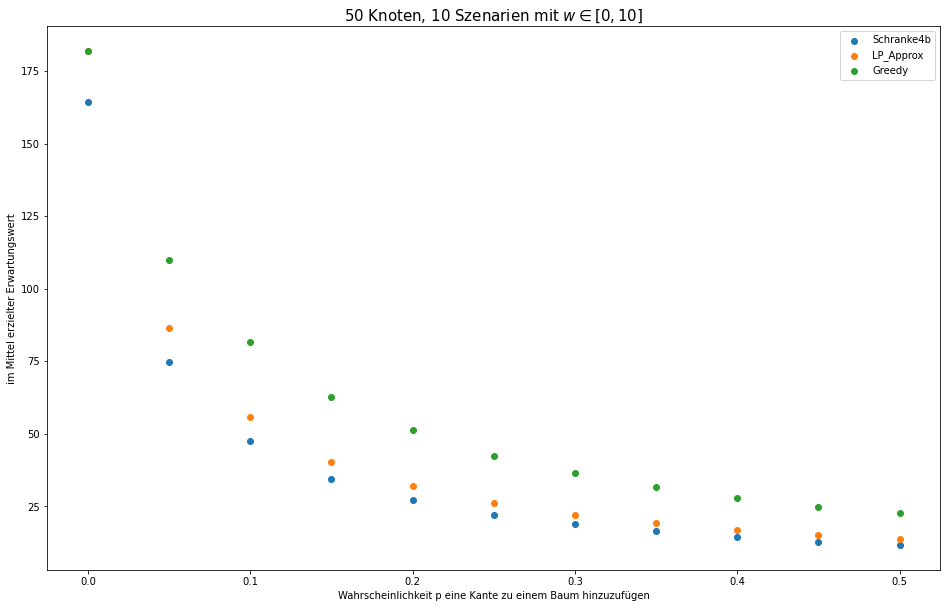

In [20]:
fig, ax = plt.subplots(figsize=(16,10))

for alg in m50:
    ax.scatter(m50[alg]['ps'], m50[alg]['ms'], label=alg)
ax.legend()
ax.set_title("50 Knoten, 10 Szenarien mit $w \in [0,10]$", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")

## Erste Auswertung:
Für hohe p, also wenn es viele Kanten gibt, dann scheint der LP-Alg für diese Kantengewichte besser zu funktionieren. Er kommt zumindest sehr nah an die Schranke heran. Das selbe gilt auch für den Greedy-Alg. Der Effekt scheint stärker zu sein, wenn ich größere Graphen betrachte.

Je mehr Kanten es gibt, desto mehr Auswahl habe ich beim Bau eines Spannbaums. Und weil jede Kante ein Zufallsgewicht bekommt, kann ich aus mehr billigen Kanten auswählen, oder?

# nochmal das gleiche, aber noch mit Optimum

In [4]:
def read_files(konfig_path):
    """
    Ist dafuer da, fuer eine Konfiguration alle Simulationen einzulesen und in ein Dataframe zu packen
    """
    
    # muss erstmal rausfinden, welche Simulationen alle gemacht wurden
    sims = os.listdir(konfig_path)
#     print(sims)

    # erstes Dataframe, an das dann angebaut wird
    df = pd.read_csv(os.path.join(konfig_path, sims[0], "results.txt")).iloc[:,:-1]
    
    for sim in sims[1:]:
#         print(sim)
#         # nehme nur alle Ordner und keine Datein
#         for alg in [a for a in os.listdir(os.path.join(dir_path, sim)) if not "." in a]:
#             print(alg)

        # nehme die results und packe sie an df dran
        df_sim = pd.read_csv(os.path.join(konfig_path, sim, "results.txt")).iloc[:,:-1]
        # dabei gehe ich aus, dass selbst, wenn die results in unterschiedlichen Spalten gespeichert werden, dass
        # die an die dazugehoerige, bereits vorhandene Spalte angegliedert werden
        df = pd.concat([df, df_sim], ignore_index=True)
    
    return df

In [48]:
def read_hauptordner(path):
    """
    path ist der Pfad zu dem Haupt-Ordner, wo die Konfigurationsordner drin liegen
    """
        
    # jetzt alle Ergebnisse einlesen
    konfigs = os.listdir(path)
    
    # dictionary, was mir fuer die verschiedenen Simulationen den Index zum relevanten Parameter gibt
    # Fuer TreePlusP, ist hier die Wahrscheinlichkeit p relevant
    d = {"TreePlusP": 1}
    
    df_res = pd.DataFrame()
    
    for k in konfigs:
        p = float(k.split("_")[d[k.split("_")[0]]])
        df = read_files(os.path.join(path, k))
        
        di = {'p': p}
        di.update({alg: df.mean()[alg] for alg in df.columns})
#         return pd.DataFrame(di, index=[0])
        df_res = pd.concat([df_res, pd.DataFrame(di, index=[0])], ignore_index=True)
    
    return df_res

In [59]:
alle_path = r"D:\Uni\Masterarbeit\Daten\Alle"
df_10_5 = read_hauptordner(os.path.join(alle_path, 'Alle_10_nodes_5_scenarios'))
df_15_5 = read_hauptordner(os.path.join(alle_path, 'Alle_15_nodes_5_scenarios'))
df_20_5 = read_hauptordner(os.path.join(alle_path, 'Alle_20_nodes_5_scenarios'))

Text(0, 0.5, 'im Mittel erzielter Erwartungswert')

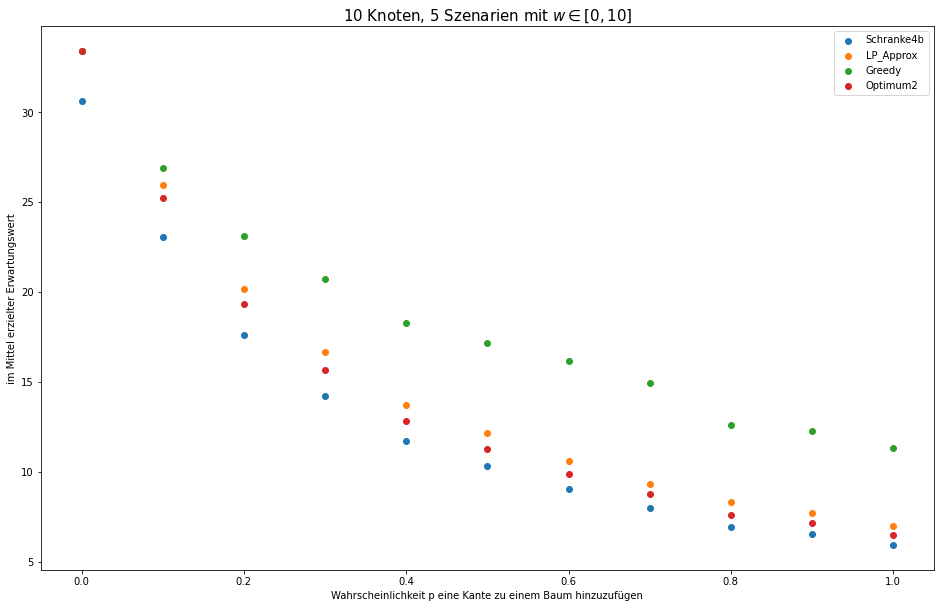

In [61]:
fig, ax = plt.subplots(figsize=(16,10))

for alg in df_10_5.columns[1:]:
    ax.scatter(df_10_5['p'], df_10_5[alg], label=alg)
ax.legend()
ax.set_title("10 Knoten, 5 Szenarien mit $w \in [0,10]$", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")

Text(0, 0.5, 'im Mittel erzielter Erwartungswert')

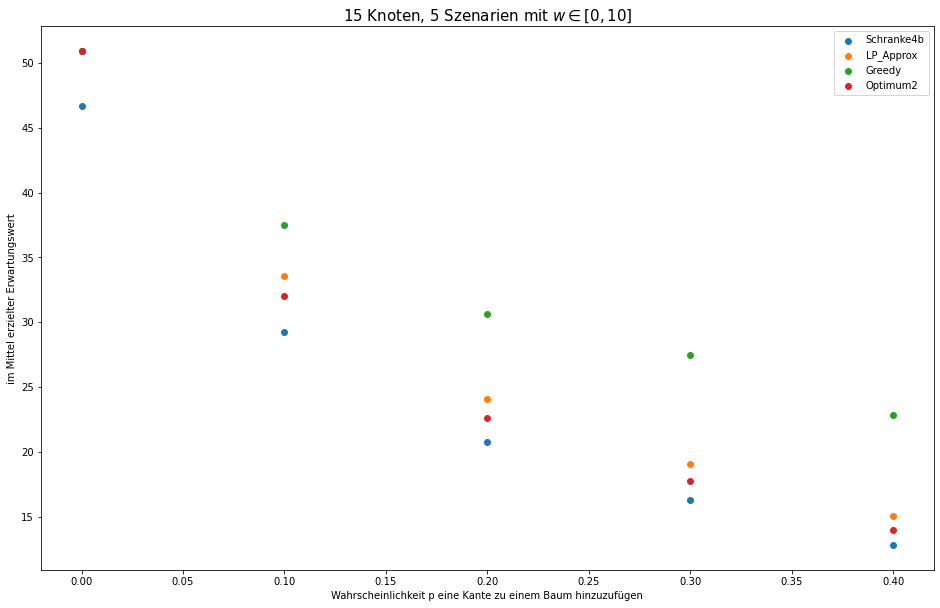

In [62]:
fig, ax = plt.subplots(figsize=(16,10))

for alg in df_15_5.columns[1:]:
    ax.scatter(df_15_5['p'], df_15_5[alg], label=alg)
ax.legend()
ax.set_title("15 Knoten, 5 Szenarien mit $w \in [0,10]$", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")

Text(0, 0.5, 'im Mittel erzielter Erwartungswert')

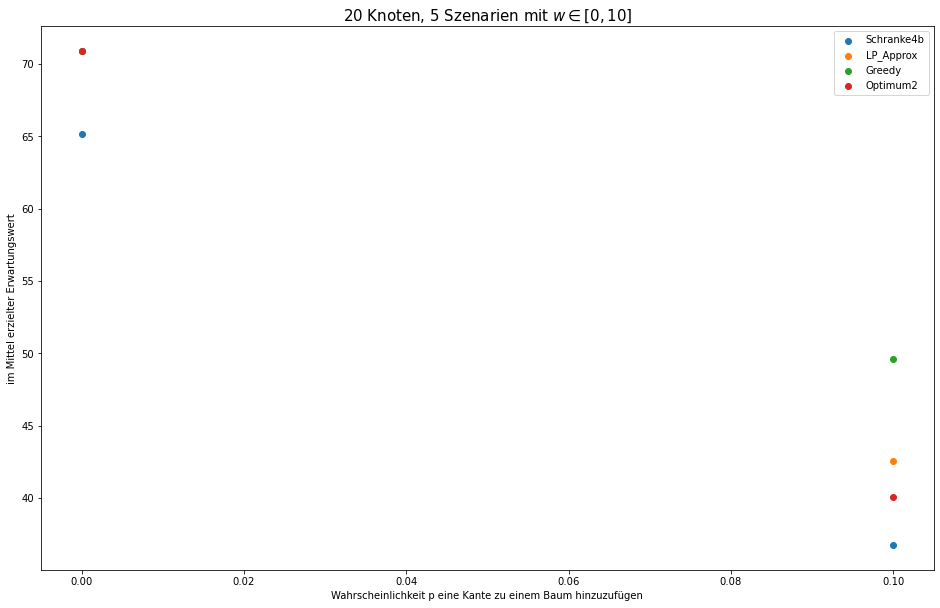

In [63]:
fig, ax = plt.subplots(figsize=(16,10))

for alg in df_20_5.columns[1:]:
    ax.scatter(df_20_5['p'], df_20_5[alg], label=alg)
ax.legend()
ax.set_title("20 Knoten, 5 Szenarien mit $w \in [0,10]$", fontsize=15)
ax.set_xlabel("Wahrscheinlichkeit p eine Kante zu einem Baum hinzuzufügen")
ax.set_ylabel("im Mittel erzielter Erwartungswert")